# **Malaria Detection**

## Detecting malaria with deep learning

Our goal is to create a deep learing model to detect detect 'Parasitized' and 'Uninfected' samples from given image data.

The images are of the blood smears of healthy and infected patients.

We will be mainly using Tensorflow framework, along with NumPy, Matplotlib, OpenCV and Scikit-learn.

## Dataset

I have the data in my Google Drive ([here is the link](https://drive.google.com/file/d/1zM2LvCaaA9-FX8G60PLt-LwAxF9yC06w/view?usp=sharing)). You may copy it into your Drive and use it.

The size of the dataset is 337MB. The dataset contains a total of 27558 images (13779 parasitized and 13779 uninfected)

## Platform

I am running this notebook on Google Colaboratory platform.

If you are running this locally or any different platform, you may need to change the 'GPU Initialization', 'Connecting to Google Drive' and 'Saving Models to Drive' sections.

# GPU Initialization

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Importing Libraries

In [ ]:
# For files and directories
import shutil
import os
import glob

# For basic operations
import numpy as np
import random

# For image visualization
import cv2
import matplotlib.pyplot as plt

# For model creation
import tensorflow as tf
import tensorflow.keras as K

# For model evaluation
import sklearn
from sklearn import metrics

# Importing Dataset

## Connecting to Google Drive (for Google Colab)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Change this to your file location of the Dataset
dataset_location_in_drive = 'gdrive/My Drive/Rahul/ML/Malaria_Detection/'

# Copying and extracting the Dataset
shutil.copyfile(dataset_location_in_drive + 'cell-images-for-detecting-malaria.zip',
                'cell_images.zip')
!unzip cell_images.zip
os.remove('cell_images.zip')

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

# Visualizing Dataset

## Checking the folders

In [ ]:
folder = 'cell_images/'

# Checking the folder for images and any extra files and also counting the images
p = 0
for file in os.listdir(folder + 'Parasitized/'):
    if file.endswith('.png'):
        p = p + 1
    else:
        print('Other files: ' + str(folder + 'Parasitized/' + file))

u = 0
for file in os.listdir(folder + 'Uninfected/'):
    if file.endswith('.png'):
        u = u + 1
    else:
        print('Other files: ' + str(folder + 'Uninfected/' + file))

print()
print('Total Parasitized images: ' + str(p))
print('Total Uninfected images: ' + str(u))

Other files: cell_images/Parasitized/Thumbs.db
Other files: cell_images/Uninfected/Thumbs.db

Total Parasitized images: 13779
Total Uninfected images: 13779


We will shuffle the paths here, so that we need not to shuffle the dataset while splitting.

In [ ]:
data_dir = 'cell_images/'

# Collecting all image paths for further use
img_paths = glob.glob(os.path.join(data_dir, '*/*.png'))

# Shuffling the paths
np.random.shuffle(img_paths)

print('Total images: ' + str(len(img_paths)) + '\n' + '\nSample image paths: ')
img_paths[:6]

Total images: 27558

Sample image paths: 


['cell_images/Uninfected/C154P115ThinF_IMG_20151115_141507_cell_15.png',
 'cell_images/Uninfected/C80P41ThinF_IMG_20150817_111544_cell_119.png',
 'cell_images/Uninfected/C237ThinF_IMG_20151127_104748_cell_67.png',
 'cell_images/Uninfected/C125P86ThinF_IMG_20151004_101158_cell_16.png',
 'cell_images/Parasitized/C118P79ThinF_IMG_20151002_105346_cell_159.png',
 'cell_images/Parasitized/C182P143NThinF_IMG_20151201_171836_cell_180.png']

## Plotting the images

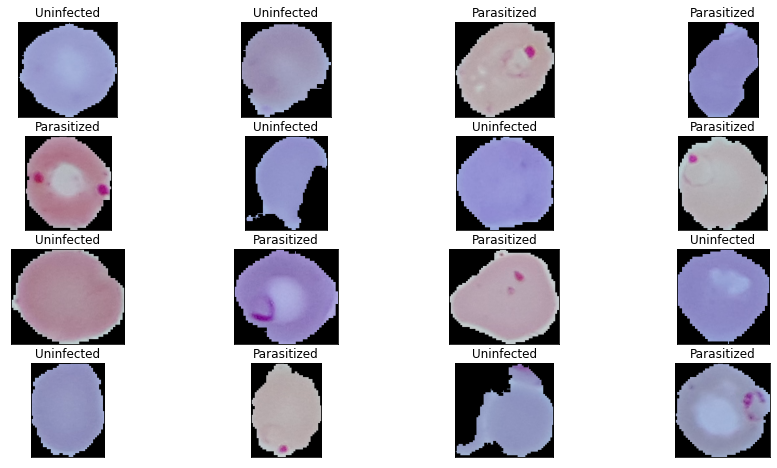

In [ ]:
# Plotting random images from the dataset
plt.figure(figsize = (15, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    ran = random.randint(0, len(img_paths)-1-i)
    plt.imshow(cv2.imread(img_paths[i+ran]), cmap = 'gray')
    plt.title(img_paths[i+ran].split('/')[1])
    plt.xticks([])
    plt.yticks([])
#Show the plot
plt.show()

## Checking image sizes

In [ ]:
a_min = np.inf
x_min = 0
y_min = 0
a_max = 0
x_max = 0
y_max = 0

# Reading all the images
for img in img_paths:
    temp = cv2.imread(img)

    # Getting the shapes of images
    a = temp.shape[0]*temp.shape[1]

    if a < a_min:
        a_min = a
        x_min = temp.shape[0]
        y_min = temp.shape[1]
            
    if a > a_max:
        a_max = a
        x_max = temp.shape[0]
        y_max = temp.shape[1]

print('Largest image is of shape : ({}, {})'.format(x_max, y_max))
print('Smallest image is of shape : ({}, {})'.format(x_min, y_min))

Largest image is of shape : (340, 364)
Smallest image is of shape : (40, 55)


In near to the middle, we may choose image size to be around (125, 125).

We will set this in 'Model Configurations' section.

# Sorting the Data

Currently we have all the images in single folder.

Now we will split the images into training set, validation set and testing set in the following way: 

    data
      |---train
      |     |---Parasitized
      |     |         |---image1
      |     |         |---image2
      |     |         |     :
      |     |         |     :
      |     |---Uninfected
      |     |         |---image1
      |     |         |---image2
      |     |         |     :
      |     |         |     :
      |---val
      |     |---Parasitized
      |     |         |---image1
      |     |         |---image2
      |     |         |     :
      |     |         |     :
      |     |---Uninfected
      |     |         |---image1
      |     |         |---image2
      |     |         |     :
      |     |         |     :
      |---test
      |     |---all_classes
      |     |         |---image1
      |     |         |---image2
      |     |         |     :
      |     |         |     :









We have already shuffled the paths, so we can directly split the data by indexing.

In [ ]:
# If you have storage issues (less storage), then uncomment the lines next to 'For storage issue'.

# This function will create the dataset according the the folders as mentioned above
def create_data(data_dir, img_paths):

    def create_images(data_dir, img_paths):
        for path in img_paths:
            shutil.copyfile(path, data_dir + '/' + path.split('/')[1] + '/' + path.split('/')[-1])

            # For storage issue
            # os.remove(path)

    # Training data
    create_images(os.path.join(data_dir, 'train'), img_paths[:-10000])

    # Validation data
    create_images(os.path.join(data_dir, 'val'), img_paths[-10000:-8000])

    # Testing data
    # Since we have single directory for test data, we will add 'Parasitized' or 'Uninfected' in the name of the file
    # to retrive the labels later on
    for path in img_paths[-8000:]:
        shutil.copyfile(path, data_dir + 'test/all_classes/' + path.split('/')[1] + '.' + path.split('/')[-1])

        # For storage issue
        # os.remove(path)

    print('Dataset created!!!')

In [ ]:
# Creating the directories
!mkdir data/
!mkdir data/train/
!mkdir data/train/Uninfected
!mkdir data/train/Parasitized
!mkdir data/val/
!mkdir data/val/Uninfected
!mkdir data/val/Parasitized
!mkdir data/test/
!mkdir data/test/all_classes

# This will be our main directory to be used
data_dir = 'data/'

# Create the dataset
create_data(data_dir, img_paths)

Dataset created!!!


# Model Configurations

Feel free to change the configurations according to your system specifications.

In [ ]:
# Reduce the batch size if you have RAM less than 8GB
batch_size = 128

# Choosing image dimension to be (125, 125)
img_size = 125

# Setting high number of epochs (considering the data and model) as we will be using early stopping
epochs = 50

In [ ]:
# This is used to plot performance graphs of our models
def performance(histories):
    plt.figure(figsize = (15, 10))
    # Plot Loss
    plt.subplot(2,2,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories.history['loss'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_loss'], color = 'red', label = 'val')
    plt.ylabel('Loss Value')
    plt.xlabel('Epoch')
    plt.legend(loc = 'best')
    # Plot Accuracy
    plt.subplot(2,2,2)
    plt.title('Classification Accuracy')
    plt.plot(histories.history['accuracy'], color = 'blue', label = 'train')
    plt.plot(histories.history['val_accuracy'], color = 'red', label = 'val')
    plt.ylabel('Accuracy Value')
    plt.xlabel('Epoch')
    plt.legend(loc = "best")
    # Show the plot
    plt.suptitle('Performance')
    plt.show()

# Create, Train and Test Models

## Data Generators

In [ ]:
# Creating training data generator
train_datagen_basic = K.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator_basic = train_datagen_basic.flow_from_directory(data_dir + 'train',
                                                                classes = {'Uninfected': 0, 'Parasitized': 1},
                                                                target_size = (img_size, img_size),
                                                                batch_size = batch_size,
                                                                class_mode = 'binary')
print(train_generator_basic.class_indices)

# Creating validation data generator
val_datagen = K.preprocessing.image.ImageDataGenerator(rescale = 1./255)
val_generator = val_datagen.flow_from_directory(data_dir + 'val',
                                                classes = {'Uninfected': 0, 'Parasitized': 1},
                                                target_size = (img_size, img_size),
                                                batch_size = batch_size,
                                                class_mode = 'binary')
print(val_generator.class_indices)

# Creating testing data generator
test_datagen = K.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(data_dir + 'test',
                                                  target_size = (img_size, img_size),
                                                  batch_size = batch_size,
                                                  class_mode = None,
                                                  shuffle = False)
test_generator.reset()

# Retrieving the true labels on test data from their filenames as saved before
y_test = []
for filename in test_generator.filenames:
    if filename.split('.')[0].split('/')[1] == 'Uninfected':
        y_test.append(0)
    else:
        y_test.append(1)
y_test = np.array(y_test)

Found 17558 images belonging to 2 classes.
{'Uninfected': 0, 'Parasitized': 1}
Found 2000 images belonging to 2 classes.
{'Uninfected': 0, 'Parasitized': 1}
Found 8000 images belonging to 1 classes.


## Basic CNN Model

### Model

In [ ]:
# Creating a basic CNN model
def define_model_CNN(img_size):

    model = K.models.Sequential()

    model.add(K.layers.Input(shape = (img_size, img_size, 3)))

    model.add(K.layers.Conv2D(32, (3, 3), padding ='same', activation = 'relu'))
    model.add(K.layers.MaxPooling2D(pool_size = (2, 2)))
    
    model.add(K.layers.Conv2D(64, (3, 3), padding ='same', activation = 'relu'))
    model.add(K.layers.MaxPooling2D(pool_size = (2, 2)))
    
    model.add(K.layers.Conv2D(128, (3, 3), padding ='same', activation = 'relu'))
    model.add(K.layers.MaxPooling2D(pool_size = (2, 2)))
    
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model_CNN = define_model_CNN(img_size)
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 125, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

### Callbacks

We will create 3 callbacks:


1.   **Model Checkpoint**
    -    To save the best model.
2.   **Early Stopping**
    -    To stop the training when validation accuracy starts increasing.
3.   **Reduce Learning rate on Plateau**
    -    To decrease the learning rate when validation loss stops decreasing.



In [ ]:
callbacks_CNN = [K.callbacks.ModelCheckpoint(data_dir + 'model_CNN.h5', save_best_only = True),
                 K.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.00001, patience = 5,
                                       verbose = 1, mode = 'auto'),
                 K.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2,
                                           mode = 'auto', min_lr = 0.000001)]

### Training

Epoch 1/50
138/138 [==============================] - 24s 174ms/step - loss: 0.5915 - accuracy: 0.6770 - val_loss: 0.2709 - val_accuracy: 0.9120
Epoch 2/50
138/138 [==============================] - 23s 170ms/step - loss: 0.2233 - accuracy: 0.9291 - val_loss: 0.1825 - val_accuracy: 0.9430
Epoch 3/50
138/138 [==============================] - 23s 168ms/step - loss: 0.1701 - accuracy: 0.9437 - val_loss: 0.1442 - val_accuracy: 0.9550
Epoch 4/50
138/138 [==============================] - 23s 168ms/step - loss: 0.1474 - accuracy: 0.9515 - val_loss: 0.1336 - val_accuracy: 0.9585
Epoch 5/50
138/138 [==============================] - 23s 165ms/step - loss: 0.1272 - accuracy: 0.9585 - val_loss: 0.1456 - val_accuracy: 0.9510
Epoch 6/50
138/138 [==============================] - 23s 165ms/step - loss: 0.1147 - accuracy: 0.9617 - val_loss: 0.1393 - val_accuracy: 0.9570
Epoch 7/50
138/138 [==============================] - 23s 166ms/step - loss: 0.0839 - accuracy: 0.9709 - val_loss: 0.1375 - val_ac

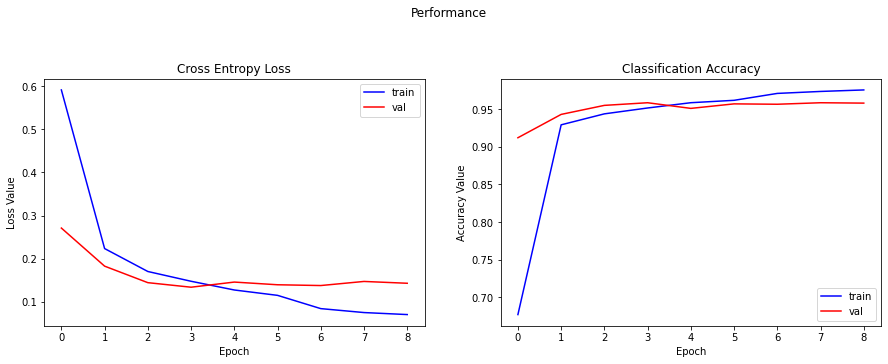

In [ ]:
history_CNN = model_CNN.fit(train_generator_basic,
                            validation_data = val_generator,
                            epochs = epochs,
                            callbacks = callbacks_CNN)

# Performance evaluation
performance(history_CNN)

### Testing

In [ ]:
# Predict and Evaluate
y_predict_CNN = (model_CNN.predict(test_generator) > 0.5).astype("int32").reshape(-1)
accuracy_CNN = np.sum(y_predict_CNN == y_test) / np.size(y_predict_CNN)
print("Test accuracy = {}".format(accuracy_CNN), '\n\n')

# Classification report
print(sklearn.metrics.classification_report(y_test, y_predict_CNN, target_names = ['Uninfected', 'Parasitized'], digits = 4))

Test accuracy = 0.959625 


              precision    recall  f1-score   support

  Uninfected     0.9495    0.9714    0.9603      4025
 Parasitized     0.9704    0.9477    0.9589      3975

    accuracy                         0.9596      8000
   macro avg     0.9599    0.9596    0.9596      8000
weighted avg     0.9599    0.9596    0.9596      8000



## Transfer Learning (VGG-19)

### Model

In [ ]:
# Creating a transfer learning model using VGG-19
def define_model_VGG(img_size):

    model = K.models.Sequential()

    model.add(K.applications.vgg19.VGG19(include_top = False, weights = 'imagenet', input_shape = (img_size, img_size, 3)))

    # Freezing all the layers of VGG-19
    for layer in model.layers:
        print(layer.trainable)
        layer.trainable = False

    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model_VGG = define_model_VGG(img_size)
model_VGG.summary()

80142336/80134624 [==============================] - 2s 0us/step
True
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
__________________________________________________

### Callbacks

We will create 3 callbacks:


1.   **Model Checkpoint**
    -    To save the best model.
2.   **Early Stopping**
    -    To stop the training when validation accuracy starts increasing.
3.   **Reduce Learning rate on Plateau**
    -    To decrease the learning rate when validation loss stops decreasing.

In [ ]:
callbacks_VGG = [K.callbacks.ModelCheckpoint(data_dir + 'model_VGG.h5', save_best_only = True),
                 K.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.00001, patience = 5,
                                       verbose = 1, mode = 'auto'),
                 K.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2,
                                           mode = 'auto', min_lr = 0.000001)]

### Training

Epoch 1/50
138/138 [==============================] - 26s 192ms/step - loss: 0.4034 - accuracy: 0.8162 - val_loss: 0.3369 - val_accuracy: 0.8480
Epoch 2/50
138/138 [==============================] - 25s 184ms/step - loss: 0.2850 - accuracy: 0.8807 - val_loss: 0.2215 - val_accuracy: 0.9095
Epoch 3/50
138/138 [==============================] - 26s 185ms/step - loss: 0.2569 - accuracy: 0.8963 - val_loss: 0.2195 - val_accuracy: 0.9175
Epoch 4/50
138/138 [==============================] - 25s 184ms/step - loss: 0.2737 - accuracy: 0.8876 - val_loss: 0.2255 - val_accuracy: 0.9105
Epoch 5/50
138/138 [==============================] - 26s 187ms/step - loss: 0.2486 - accuracy: 0.8994 - val_loss: 0.1962 - val_accuracy: 0.9240
Epoch 6/50
138/138 [==============================] - 25s 182ms/step - loss: 0.2533 - accuracy: 0.8946 - val_loss: 0.1969 - val_accuracy: 0.9225
Epoch 7/50
138/138 [==============================] - 25s 182ms/step - loss: 0.2439 - accuracy: 0.9000 - val_loss: 0.2026 - val_ac

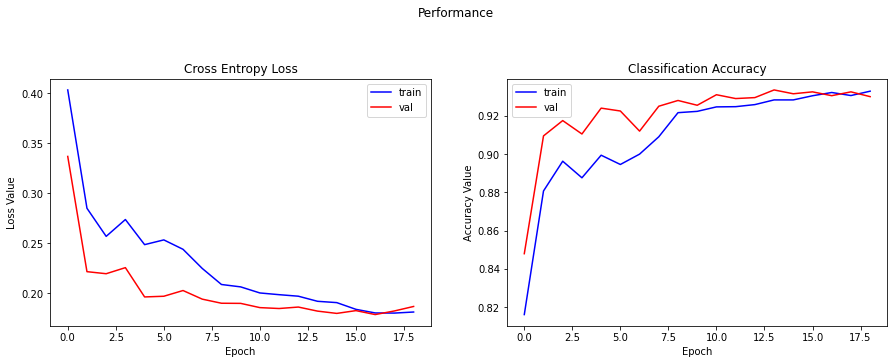

In [ ]:
history_VGG = model_VGG.fit(train_generator_basic,
                            validation_data = val_generator,
                            epochs = epochs,
                            callbacks = callbacks_VGG)

# Performance evaluation
performance(history_VGG)

### Testing

In [ ]:
# Predict and Evaluate
y_predict_VGG = (model_VGG.predict(test_generator) > 0.5).astype("int32").reshape(-1)
accuracy_VGG = np.sum(y_predict_VGG == y_test) / np.size(y_predict_VGG)
print("Test accuracy = {}".format(accuracy_VGG), '\n\n')

# Classification report
print(sklearn.metrics.classification_report(y_test, y_predict_VGG, target_names = ['Uninfected', 'Parasitized'], digits = 4))

Test accuracy = 0.93275 


              precision    recall  f1-score   support

  Uninfected     0.9107    0.9605    0.9349      4025
 Parasitized     0.9577    0.9047    0.9304      3975

    accuracy                         0.9327      8000
   macro avg     0.9342    0.9326    0.9327      8000
weighted avg     0.9340    0.9327    0.9327      8000



## Transfer Learning (Fine-Tuned VGG-19)

### Model

In [ ]:
# Creating a fine-tuned transfer learning model using VGG-19
def define_model_ftVGG(img_size):

    vgg = tf.keras.applications.vgg19.VGG19(include_top = False, weights = 'imagenet', input_shape = (img_size, img_size, 3))

    # Freezing the layers of VGG-19 except few
    for layer in vgg.layers:
        if layer.name in ['block3_conv1', 'block4_conv1', 'block5_conv1']:
            layer.trainable = True
        else:
            layer.trainable = False

    model = K.models.Sequential()

    model.add(vgg)

    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(512, activation = 'relu'))
    model.add(K.layers.Dropout(0.5))
    model.add(K.layers.Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model_ftVGG = define_model_ftVGG(img_size)
model_ftVGG.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

### Callbacks

We will create 3 callbacks:


1.   **Model Checkpoint**
    -    To save the best model.
2.   **Early Stopping**
    -    To stop the training when validation accuracy starts increasing.
3.   **Reduce Learning rate on Plateau**
    -    To decrease the learning rate when validation loss stops decreasing.

In [ ]:
callbacks_ftVGG = [K.callbacks.ModelCheckpoint(data_dir + 'model_ftVGG.h5', save_best_only = True),
                   K.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.00001, patience = 5,
                                       verbose = 1, mode = 'auto'),
                   K.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2,
                                           mode = 'auto', min_lr = 0.000001)]

### Training

Epoch 1/50
138/138 [==============================] - 29s 207ms/step - loss: 0.4655 - accuracy: 0.7296 - val_loss: 0.1552 - val_accuracy: 0.9540
Epoch 2/50
138/138 [==============================] - 28s 202ms/step - loss: 0.1595 - accuracy: 0.9501 - val_loss: 0.1344 - val_accuracy: 0.9555
Epoch 3/50
138/138 [==============================] - 28s 203ms/step - loss: 0.1453 - accuracy: 0.9550 - val_loss: 0.1342 - val_accuracy: 0.9570
Epoch 4/50
138/138 [==============================] - 28s 201ms/step - loss: 0.1372 - accuracy: 0.9565 - val_loss: 0.1290 - val_accuracy: 0.9560
Epoch 5/50
138/138 [==============================] - 27s 199ms/step - loss: 0.1334 - accuracy: 0.9573 - val_loss: 0.1287 - val_accuracy: 0.9570
Epoch 6/50
138/138 [==============================] - 27s 199ms/step - loss: 0.1308 - accuracy: 0.9574 - val_loss: 0.1211 - val_accuracy: 0.9580
Epoch 7/50
138/138 [==============================] - 27s 198ms/step - loss: 0.1259 - accuracy: 0.9584 - val_loss: 0.1206 - val_ac

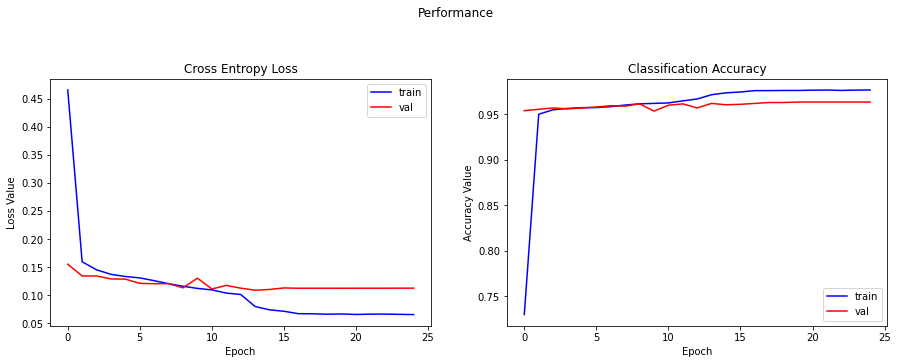

In [ ]:
history_ftVGG = model_ftVGG.fit(train_generator_basic,
                                validation_data = val_generator,
                                epochs = epochs,
                                callbacks = callbacks_ftVGG)

# Performance evaluation
performance(history_ftVGG)

### Testing

In [ ]:
# Predict and Evaluate
y_predict_ftVGG = (model_ftVGG.predict(test_generator) > 0.5).astype("int32").reshape(-1)
accuracy_ftVGG = np.sum(y_predict_ftVGG == y_test) / np.size(y_predict_ftVGG)
print("Test accuracy = {}".format(accuracy_ftVGG), '\n\n')

# Classification report
print(sklearn.metrics.classification_report(y_test, y_predict_ftVGG, target_names = ['Uninfected', 'Parasitized'], digits = 4))

Test accuracy = 0.966 


              precision    recall  f1-score   support

  Uninfected     0.9614    0.9714    0.9664      4025
 Parasitized     0.9708    0.9605    0.9656      3975

    accuracy                         0.9660      8000
   macro avg     0.9661    0.9660    0.9660      8000
weighted avg     0.9660    0.9660    0.9660      8000



## Data Augmentation with Transfer Learning (Fine-Tuned VGG-19)

### Augmented Data Generator

We will not augment our validation data as we should always try keeping validation and testing data as similar as possible for better results.

In [ ]:
# Creating an augmented training data generator
train_datagen_aug = K.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                             zoom_range = 0.05,
                                                             rotation_range = 25,
                                                             width_shift_range = 0.05,
                                                             height_shift_range = 0.05,
                                                             shear_range = 0.05,
                                                             horizontal_flip = True,
                                                             vertical_flip = True,
                                                             fill_mode = 'nearest')
train_generator_aug = train_datagen_aug.flow_from_directory(data_dir + 'train',
                                                            classes = {'Uninfected': 0, 'Parasitized': 1},
                                                            target_size = (img_size, img_size),
                                                            batch_size = batch_size,
                                                            class_mode = 'binary')
print(train_generator_aug.class_indices)

Found 17558 images belonging to 2 classes.
{'Uninfected': 0, 'Parasitized': 1}


### Model

In [ ]:
# Creating the same fine-tuned VGG-19 model
model_ftVGG_aug = define_model_ftVGG(img_size)
model_ftVGG_aug.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               2359808   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

### Callbacks

We will create 3 callbacks:


1.   **Model Checkpoint**
    -    To save the best model.
2.   **Early Stopping**
    -    To stop the training when validation accuracy starts increasing.
3.   **Reduce Learning rate on Plateau**
    -    To decrease the learning rate when validation loss stops decreasing.

In [ ]:
callbacks_ftVGG_aug = [K.callbacks.ModelCheckpoint(data_dir + 'model_ftVGG_aug.h5', save_best_only = True),
                       K.callbacks.EarlyStopping(monitor = 'val_accuracy', min_delta = 0.00001, patience = 5,
                                       verbose = 1, mode = 'auto'),
                       K.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2,
                                           mode = 'auto', min_lr = 0.000001)]

### Training

Epoch 1/50
138/138 [==============================] - 84s 612ms/step - loss: 0.3888 - accuracy: 0.7983 - val_loss: 0.1596 - val_accuracy: 0.9505
Epoch 2/50
138/138 [==============================] - 84s 609ms/step - loss: 0.1656 - accuracy: 0.9505 - val_loss: 0.1564 - val_accuracy: 0.9535
Epoch 3/50
138/138 [==============================] - 85s 618ms/step - loss: 0.1522 - accuracy: 0.9539 - val_loss: 0.1363 - val_accuracy: 0.9590
Epoch 4/50
138/138 [==============================] - 84s 610ms/step - loss: 0.1494 - accuracy: 0.9531 - val_loss: 0.1624 - val_accuracy: 0.9530
Epoch 5/50
138/138 [==============================] - 83s 604ms/step - loss: 0.1453 - accuracy: 0.9548 - val_loss: 0.1254 - val_accuracy: 0.9595
Epoch 6/50
138/138 [==============================] - 82s 592ms/step - loss: 0.1386 - accuracy: 0.9551 - val_loss: 0.1184 - val_accuracy: 0.9630
Epoch 7/50
138/138 [==============================] - 82s 591ms/step - loss: 0.1409 - accuracy: 0.9555 - val_loss: 0.1170 - val_ac

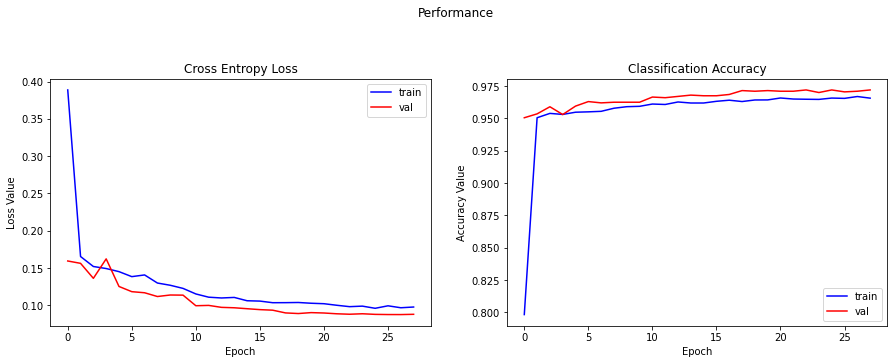

In [ ]:
history_ftVGG_aug = model_ftVGG_aug.fit(train_generator_aug,
                                        validation_data = val_generator,
                                        epochs = epochs,
                                        callbacks = callbacks_ftVGG_aug)

# Performance evaluation
performance(history_ftVGG_aug)

### Testing

In [ ]:
# Predict and Evaluate
y_predict_ftVGG_aug = (model_ftVGG_aug.predict(test_generator) > 0.5).astype("int32").reshape(-1)
accuracy_ftVGG_aug = np.sum(y_predict_ftVGG_aug == y_test) / np.size(y_predict_ftVGG_aug)
print("Test accuracy = {}".format(accuracy_ftVGG_aug), '\n\n')

# Classification report
print(sklearn.metrics.classification_report(y_test, y_predict_ftVGG_aug, target_names = ['Uninfected', 'Parasitized'], digits = 4))

Test accuracy = 0.967625 


              precision    recall  f1-score   support

  Uninfected     0.9640    0.9719    0.9680      4025
 Parasitized     0.9713    0.9633    0.9673      3975

    accuracy                         0.9676      8000
   macro avg     0.9677    0.9676    0.9676      8000
weighted avg     0.9677    0.9676    0.9676      8000



## Ensembling Models

Here, we will ensemble 2 models:


1.   Fine-tuned transfer learning model (VGG-19) **without** augmented data generator.
2.   Fine-tuned transfer learning model (VGG-19) **with** augmented data generator.



Since we have already trained both the models, there is no need to train the models again. Thus, we will diectly test the ensembled model.

### Testing

In [ ]:
# Predict and Evaluate
y_predict_ensemble = (((model_ftVGG_aug.predict(test_generator) > 0.5).astype("int32").reshape(-1) + 
                       (model_ftVGG.predict(test_generator) > 0.5).astype("int32").reshape(-1))/2).astype("int32")
accuracy_ensemble = np.sum(y_predict_ensemble == y_test) / np.size(y_predict_ensemble)
print("Test accuracy = {}".format(accuracy_ensemble), '\n\n')

# Classification report
print(sklearn.metrics.classification_report(y_test, y_predict_ensemble, target_names = ['Uninfected', 'Parasitized'], digits = 4))

Test accuracy = 0.968125 


              precision    recall  f1-score   support

  Uninfected     0.9558    0.9821    0.9688      4025
 Parasitized     0.9814    0.9540    0.9675      3975

    accuracy                         0.9681      8000
   macro avg     0.9686    0.9680    0.9681      8000
weighted avg     0.9685    0.9681    0.9681      8000



# Inferences

## Model accuracies





Model accuracies (on test set):

    1. Basic CNN                                         (without Data Augmentation)  --  95.9525 %
    2. Transfer Learning        (VGG-19)                 (without Data Augmentation)  --  93.2750 %
    3. Transfer Learning        (fine-tuned VGG-19)      (without Data Augmentation)  --  96.6000 %
    4. Transfer Learning        (fine-tuned VGG-19)      (with Data Augmentation)     --  96.7625 %
    5. Ensembling (3) and (4)                                                         --  96.8125 %

Thus, the highest accuracy we got is **96.8125%**

## Inferences:


1.   Shallow network (with just 3 CNN layers) overfits the data very early (in just about 4 epochs), but provides a good accuracy too.
2.   Using deeper architecture results in higher accuracy only when we fine-tune the network by training middle layers too.
3.   On using data augmentation, we get a little higher accuracy. But it is very beneficial as the validation loss is effectively less compared to non-augmented model. So, it predicts with higher confidence.
4.   Ensembling the model makes benefits from both the models. Thus instead of getting the mean accuracy of the two, we get slightly higher accuracy than both the individual models.


# Saving Models to Drive

We will save our models on the drive for further uses.

In [ ]:
# Copying the models to drive
for file in os.listdir(data_dir):
    if file.endswith('.h5'):
        shutil.copyfile(data_dir + file, dataset_location_in_drive + file)

'gdrive/My Drive/Rahul/ML/Malaria_Detection/model_ftVGG_aug.h5'

# The end